In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import scipy
from scipy.stats.stats import pearsonr


In [129]:
data=pd.read_csv("Add_sales_data_2018.csv")
data

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [67]:
data.head

<bound method NDFrame.head of            Date  Add1(in Thousands)  Add2(in Thousands)  Add3(in Thousands)  \
0    2018-10-08              208.00              222.25              206.85   
1    2018-10-05              217.00              218.60              205.90   
2    2018-10-04              223.50              227.80              216.15   
3    2018-10-03              230.00              237.50              225.75   
4    2018-10-01              234.55              234.60              221.05   
..          ...                 ...                 ...                 ...   
200  2017-12-14              288.00              288.25              279.20   
201  2017-12-13              290.00              292.50              282.20   
202  2017-12-12              298.60              298.60              286.65   
203  2017-12-11              290.00              299.55              285.90   
204  2017-12-08              287.55              289.90              285.05   

     Add4(in Thousand

In [68]:
data.isnull().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [69]:
data.shape

(205, 7)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [71]:
data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

## 1.  Check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<AxesSubplot:>

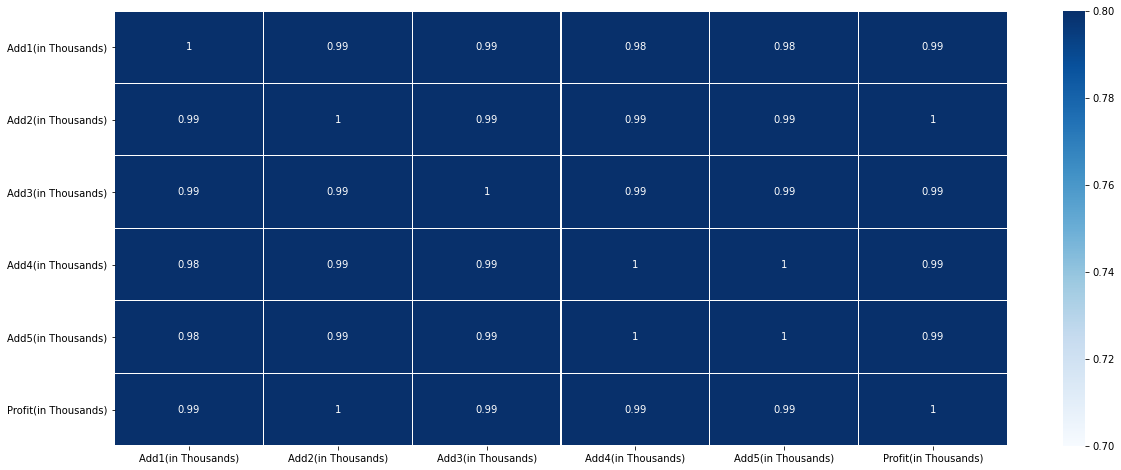

In [301]:
corr=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=0.7,vmax=0.8,annot=True,linewidth=0.2,cmap="Blues")

***
**The amount spent for advertising through five different companies and profit generated are highly correlated. And Add2 and profit have strong correlation**
***

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

***
### Attempt #1
***

In [277]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [278]:
y=data["Profit(in Thousands)"]
x=data.drop(['Add2(in Thousands)','Date','Profit(in Thousands)'],axis=1)

In [279]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [280]:
lr= linear_model.LinearRegression()

In [281]:
model= lr.fit(x_train, y_train)

In [282]:
predictions=model.predict(x_test)

In [283]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [284]:
print(predictions)

[4182.72271459 4426.1011238  5038.06212842 4927.36716247 5032.39628612
 4620.15191299 5381.18847206 5316.60745881 5204.53815451 5935.91050279
 5788.47655949 4990.36718787 5058.40006565 5798.96238789 4963.3525098
 5068.96959938 4217.87761717 5054.22865839 5029.61004532 5138.7783579
 5151.27361059 5411.49229686 4561.96503369 4611.21766893 4445.26156003
 4155.78865353 5590.86767575 5686.60053886 4658.87728551 5704.07044013
 4985.03425498 5198.87837387 5033.74342627 5528.44634392 5027.24339974
 5049.37268433 5114.00702613 4727.4058958  4598.80007692 4926.00746743
 5212.85737542 5044.73898847 5513.94697171 4990.87701024 4666.01485475
 4490.30686626 4467.19745689 5274.91938195 5416.47183778 4505.53140875
 4222.99014137 6021.73360209]


In [285]:

print('MSE is:', mean_squared_error(y_test,predictions))

MSE is: 548.8209974828515


In [286]:
model.intercept_

86.84771163986352

In [287]:
(sum(predictions)/sum(y_test))*100

100.00747602053654

***
### Attempt #2
***

In [288]:
y2=data["Profit(in Thousands)"]
x2=data.drop(['Date','Profit(in Thousands)'],axis=1)

In [289]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=42,test_size=.25)

In [290]:
lr2= linear_model.LinearRegression()

In [291]:
model2= lr2.fit(x2_train, y2_train)

In [292]:
predictions2=model2.predict(x2_test)

In [293]:
print(y2_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [294]:
print(predictions2)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


In [295]:
print('MSE is:', mean_squared_error(y2_test,predictions2))

MSE is: 8.11273293080854e-25


In [296]:
model2.intercept_

0.0

In [297]:
(sum(predictions2)/sum(y2_test))*100

99.99999999999999

## 3.  Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

1. Add1(in Thousands)  290

2. Add2(in Thousands)  312

3. Add3(in Thousands)  309

4. Add4(in Thousands)  298

5. Add5(in Thousands)  320

In [298]:
NewAdd_prediction=[[290,309,298,320]]
print('Predicted profit is:',(model.predict(NewAdd_prediction).item()))

Predicted profit is: 5876.784905172414


In [299]:
NewAdd_prediction2=[[290,312,309,298,320]]
print('Predicted profit is:',(model2.predict(NewAdd_prediction2).item()))

Predicted profit is: 5820.0599999999995
